In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import ConnectionPatch

In [3]:
# Read GPS coordinates from CSV file
gps = pd.read_csv("../data/sample_data_mada.csv", index_col=0)
# gps = pd.read_csv("../data/sample_data_single.csv", index_col=0)
gps.index.name = "ID"

x1, y1:  0 0
display_xy1:  [150.  66.]
fig_xy1:  [0.125 0.11 ]
display_xy2:  [909.94537841 418.41042375]
fig_xy2:  [0.75828782 0.69735071] --> Correct


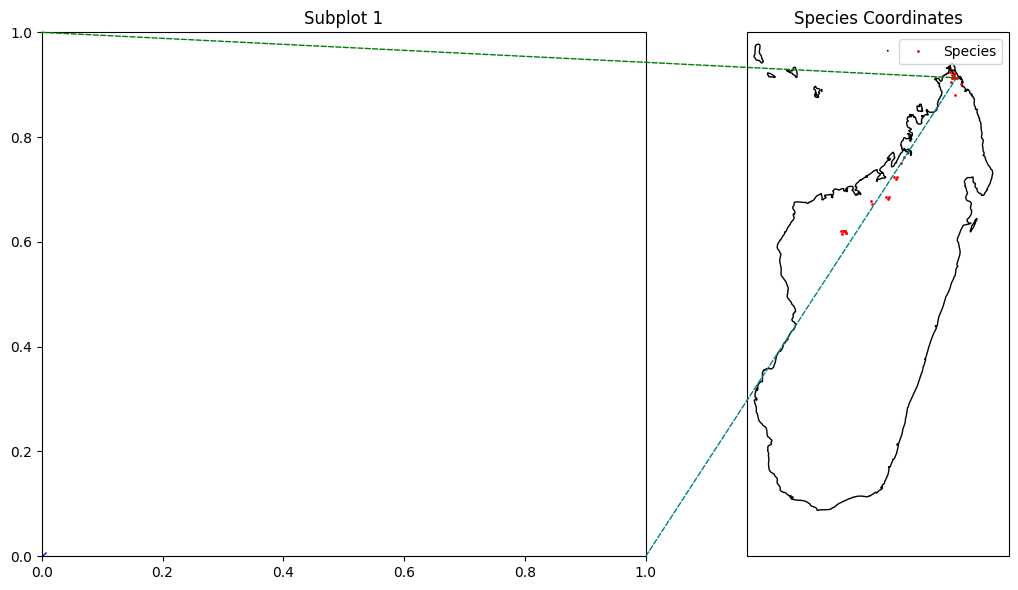

In [4]:
# Create a new map with PlateCarree projection
fig = plt.figure(figsize=(12, 6))

# --------------------------------------
# ------------  Phylogenetic MAP -------
# --------------------------------------

# Create subplot 1
ax1 = fig.add_subplot(1, 2, 1)

x1, y1 = 0, 0  # Example point in subplot 1

ax1.plot(x1, y1, 'bx', label='Point 1')
ax1.set_title('Subplot 1')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
# ax1.legend()

# Transform the point coordinates from data coordinates to display coordinates, then to figure coordinates
print('x1, y1: ', x1, y1)
display_xy1 = ax1.transData.transform((x1, y1))
print('display_xy1: ', display_xy1)
fig_xy1 = fig.transFigure.inverted().transform(display_xy1)
print('fig_xy1: ', fig_xy1)

# --------------------------------------
# ------------  GRAPH MAP --------------
# --------------------------------------

# Create subplot 2 with the map plot
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree()) # PROBLEM HERE
# Define the extent of the map (centered around Madagascar)
extent = [43, 51, -27, -11]
ax2.set_extent(extent)

# Plot points from GPS dataframe on the map
for index, row in gps.iterrows():
    ax2.plot(row["longitude"], row["latitude"], 'ro', markersize=1)

# Add coastlines and country borders for context
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.BORDERS)

ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.set_title("Species Coordinates")
ax2.legend(['Species'], loc='upper right')


# --------------------------------------
# ------------  Line mapping -----------
# --------------------------------------

# Hard-code specific coordinates
# longitude, latitude = 47.5, -18.9  # Example coordinates
# longitude, latitude = 47.781762,-14.79531  # Example coordinates (L31, C_perrieri_A12,47.781762,-14.79531)
longitude, latitude = 47.781762,-14.79531  # Example coordinates (Single, C_bissetiae,47.590008,-15.407416)
display_xy2 = ax2.transData.transform((longitude, latitude))
print('display_xy2: ', display_xy2)
# print(fig_xy2)
fig_xy2 = fig.transFigure.inverted().transform(display_xy2)
print('fig_xy2: ', fig_xy2, '--> Correct')



# ------------------------------------------
# ------------  Connection patch -----------
# ------------------------------------------

xyA = (0, 1)  # Point in the First subplot
# xyB = (2, 2)  # Point in the Second subplot
xyB = (47.781762,-14.79531) # Point in the Second subplot
xyB = (49.39833,-12.388317) # Point in the Second subplot

# Create a ConnectionPatch (green)
con = ConnectionPatch(
    xyA=xyA, coordsA="data",
    xyB=xyB, coordsB="data",
    axesA=ax1, axesB=ax2,
    color="green", linewidth=1, linestyle="--",
    zorder=2
)

# Add the ConnectionPatch to the Cartesian subplot's axes
fig.add_artist(con)

xyA = (1, 0)  # Point in the First subplot
# Create a ConnectionPatch (teal)
con = ConnectionPatch(
    xyA=xyA, coordsA="data",
    xyB=xyB, coordsB="data",
    axesA=ax1, axesB=ax2,
    color="teal", linewidth=1, linestyle="--"
)

fig.add_artist(con)

# Adjust layout and display
plt.tight_layout()
plt.show()

x1, y1:  0 0
display_xy1:  [150.  66.]
fig_xy1:  [0.125 0.11 ]
display_xy2:  [909.94537841 418.41042375]
fig_xy2:  [0.75828782 0.69735071] --> Correct


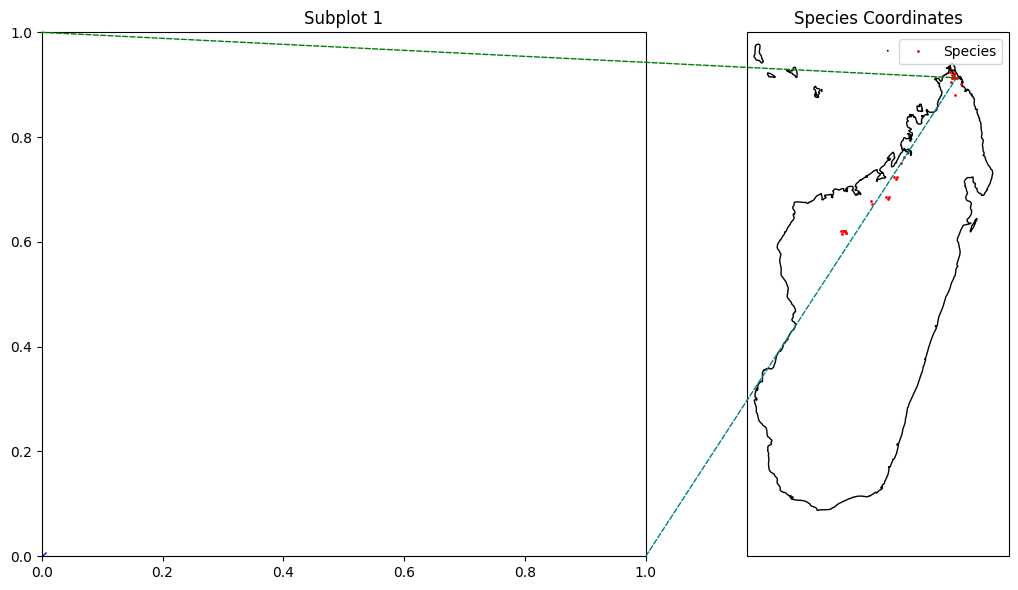

In [5]:
# Create a new map with PlateCarree projection
fig = plt.figure(figsize=(12, 6))

# --------------------------------------
# ------------  Phylogenetic MAP -------
# --------------------------------------

# Create subplot 1
ax1 = fig.add_subplot(1, 2, 1)

x1, y1 = 0, 0  # Example point in subplot 1

ax1.plot(x1, y1, 'bx', label='Point 1')
ax1.set_title('Subplot 1')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
# ax1.legend()

# Transform the point coordinates from data coordinates to display coordinates, then to figure coordinates
print('x1, y1: ', x1, y1)
display_xy1 = ax1.transData.transform((x1, y1))
print('display_xy1: ', display_xy1)
fig_xy1 = fig.transFigure.inverted().transform(display_xy1)
print('fig_xy1: ', fig_xy1)

# --------------------------------------
# ------------  GRAPH MAP --------------
# --------------------------------------

# Create subplot 2 with the map plot
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree()) # PROBLEM HERE
# Define the extent of the map (centered around Madagascar)
extent = [43, 51, -27, -11]
ax2.set_extent(extent)

# Plot points from GPS dataframe on the map
for index, row in gps.iterrows():
    ax2.plot(row["longitude"], row["latitude"], 'ro', markersize=1)

# Add coastlines and country borders for context
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.BORDERS)

ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.set_title("Species Coordinates")
ax2.legend(['Species'], loc='upper right')


# --------------------------------------
# ------------  Line mapping -----------
# --------------------------------------

# Hard-code specific coordinates
# longitude, latitude = 47.5, -18.9  # Example coordinates
# longitude, latitude = 47.781762,-14.79531  # Example coordinates (L31, C_perrieri_A12,47.781762,-14.79531)
longitude, latitude = 47.781762,-14.79531  # Example coordinates (Single, C_bissetiae,47.590008,-15.407416)
display_xy2 = ax2.transData.transform((longitude, latitude))
print('display_xy2: ', display_xy2)
# print(fig_xy2)
fig_xy2 = fig.transFigure.inverted().transform(display_xy2)
print('fig_xy2: ', fig_xy2, '--> Correct')



# ------------------------------------------
# ------------  Connection patch -----------
# ------------------------------------------

xyA = (0, 1)  # Point in the First subplot
# xyB = (2, 2)  # Point in the Second subplot
xyB = (47.781762,-14.79531) # Point in the Second subplot
xyB = (49.39833,-12.388317) # Point in the Second subplot

# Create a ConnectionPatch (green)
con = ConnectionPatch(
    xyA=xyA, coordsA="data",
    xyB=xyB, coordsB="data",
    axesA=ax1, axesB=ax2,
    color="green", linewidth=1, linestyle="--",
    zorder=2
)

# Add the ConnectionPatch to the Cartesian subplot's axes
fig.add_artist(con)

xyA = (1, 0)  # Point in the First subplot
# Create a ConnectionPatch (teal)
con = ConnectionPatch(
    xyA=xyA, coordsA="data",
    xyB=xyB, coordsB="data",
    axesA=ax1, axesB=ax2,
    color="teal", linewidth=1, linestyle="--"
)

fig.add_artist(con)

# Adjust layout and display
plt.tight_layout()
plt.show()